In [1]:
import math  # Provides access to mathematical functions
import numpy as np  # Used for numerical operations and array handling
import matplotlib.pyplot as plt  # Library for plotting graphs
%matplotlib inline

In [2]:
# Define a quadratic function f(x) = 3x^2 - 4x + 5
def f(x):
    return 3 * x**2 - 4 * x + 5

In [3]:
# Evaluate the function at x = 3.0
f(3.0)

20.0

In [4]:
# Creates an array of x values ranging from -5 to 5 with a step size of 0.25
xs = np.arange(-5, 5, 0.25)
# Compute the corresponding y values using the function f(x)
ys = f(xs)
# Display the computed y values
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

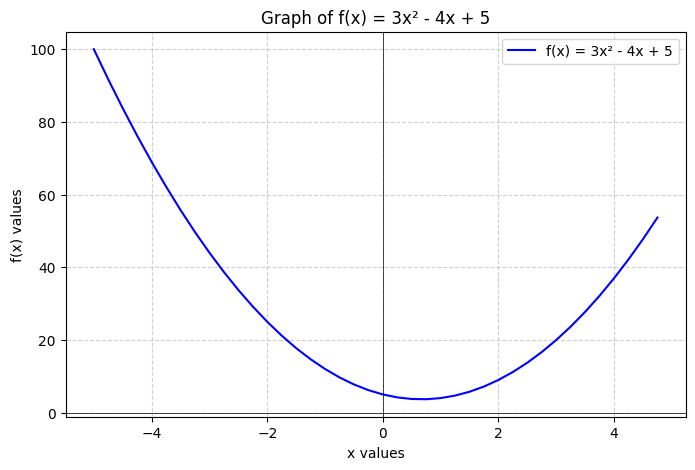

In [5]:
# Plot the function
plt.figure(figsize=(8, 5))  # Set figure size
plt.plot(xs, ys, label="f(x) = 3x² - 4x + 5", color="b")  # Plot x vs. y
plt.xlabel("x values")  # Label for x-axis
plt.ylabel("f(x) values")  # Label for y-axis
plt.title("Graph of f(x) = 3x² - 4x + 5")  # Title of the plot
plt.axhline(0, color="black", linewidth=0.5)  # Add horizontal axis
plt.axvline(0, color="black", linewidth=0.5)  # Add vertical axis
plt.grid(True, linestyle="--", alpha=0.6)  # Add a grid for better readability
plt.legend()  # Show legend
plt.show()  # Display the plot

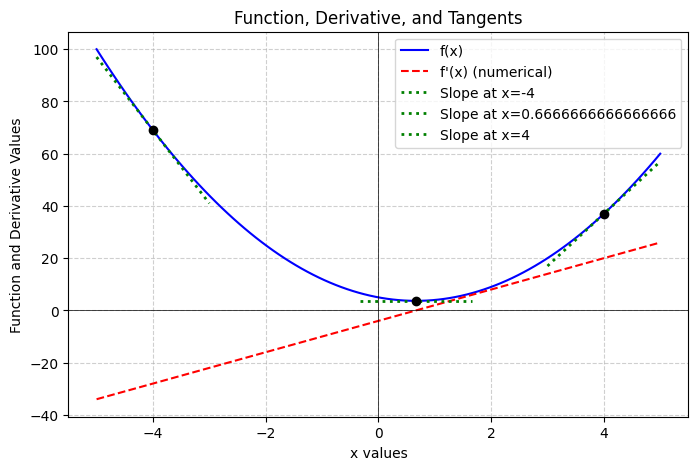

In [6]:
# Compute numerical derivative using finite differences
def numerical_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)  # Central difference approximation

# Create an array of x values
xs = np.linspace(-5, 5, 100)  # Smooth range for better visualization
ys = f(xs)  # Compute function values


# Compute numerical derivative values
dys = np.array([numerical_derivative(f, x) for x in xs])

# Select specific points where we want to visualize the tangent lines
x_tangent_points = [-4, 2/3, 4]  # Points where we visualize slope
tangent_lines = []

for x0 in x_tangent_points:
    slope = numerical_derivative(f, x0)  # Compute derivative at x0
    y0 = f(x0)  # Compute function value at x0
    tangent_xs = np.linspace(x0 - 1, x0 + 1, 10)  # Small range around x0
    tangent_ys = y0 + slope * (tangent_xs - x0)  # Equation of the tangent line
    tangent_lines.append((tangent_xs, tangent_ys, x0, y0))

# Plot function and derivative
plt.figure(figsize=(8, 5))
plt.plot(xs, ys, label="f(x)", color="b")  # Function plot
plt.plot(
    xs, dys, label="f'(x) (numerical)", color="r", linestyle="--"
)  # Numerical derivative

# Plot tangent lines
for tangent_xs, tangent_ys, x0, y0 in tangent_lines:
    plt.plot(
        tangent_xs,
        tangent_ys,
        color="g",
        linestyle="dotted",
        linewidth=2,
        label=f"Slope at x={x0}",
    )
    plt.scatter(x0, y0, color="black", marker="o", zorder=3)  # Mark the tangent points

# Add labels, title, and grid
plt.xlabel("x values")
plt.ylabel("Function and Derivative Values")
plt.title("Function, Derivative, and Tangents")
plt.axhline(0, color="black", linewidth=0.5)  # Horizontal axis
plt.axvline(0, color="black", linewidth=0.5)  # Vertical axis
plt.grid(True, linestyle="--", alpha=0.6)  # Grid for readability
plt.legend()  # Show legend
plt.show()  # Display the plot

In [7]:
def get_slope_at_x(x):
    """
    Returns the numerical derivative (slope) of f(x) at a given x value.
    """
    return numerical_derivative(f, x)

x_value = 4  # Change this to test different x values
slope = get_slope_at_x(x_value)
print(f"The slope at x = {x_value} is {slope:.4f}")

The slope at x = 4 is 20.0000


In [8]:
# What This Shows:

# ✅ Basic Computation in a Neural Network:
# 	•	This is similar to how a neuron computes an output using weights and biases.
# 	•	A real neuron applies an activation function afterward (e.g., ReLU, sigmoid).

# ✅ Gradient-Based Learning (Gradient Descent):
# 	•	In training, we compute gradients (derivatives) of this operation with respect to  a, b, c .
# 	•	This helps in adjusting weights to minimize loss.

# Working with scalers for simplicity, but the underlying principle is applicable to tensors.

# Initialize variables (these could represent weights and biases in a neural network)
a = 2.0  # Example input
b = -3.0  # Example weight
c = 10.0  # Example bias term

# Compute a simple operation for our expression graph (similar to a neuron’s computation in a forward pass)
d = a * b + c  # This mimics the weighted sum: (input[a] * weight[b]) + bias[c]

# Print the result
print(d)  # Output of the computation (could represent a neuron's activation before applying a non-linearity)

# We're heading towards backpropagation 🚀

4.0


In [9]:
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data  # Scalar value
        self.grad = 0.0  # Derivative of loss w.r.t. this value
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data}, grad={self.grad})"

    # Addition
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(
            self.data + other.data,
            (self, other),
            "+",
            label=f"({self.label}+{other.label})",
        )

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __radd__(self, other):
        return self + other

    # Subtraction
    def __sub__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(
            self.data - other.data,
            (self, other),
            "-",
            label=f"({self.label}-{other.label})",
        )

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += -1.0 * out.grad

        out._backward = _backward
        return out

    def __rsub__(self, other):
        return Value(other) - self

    # Power function (Exponentiation)
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "Only supports int or float exponents"
        out = Value(self.data**other, (self,), f"**{other}")
        out.label = f"({self.label}**{other})"

        def _backward():
            self.grad += (other * self.data ** (other - 1)) * out.grad

        out._backward = _backward
        return out

    # Multiplication
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(
            self.data * other.data,
            (self, other),
            "*",
            label=f"({self.label}*{other.label})",
        )

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def __rmul__(self, other):
        return self * other

    # Division
    def __truediv__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        reciprocal = other ** -1  # Compute other raised to -1 (reciprocal)
        out = self * reciprocal  # Multiply self by reciprocal
        out.label = f"({self.label}/{other.label})"
        return out

    def __rtruediv__(self, other):
        return Value(other) / self

    # Exponential function using math.exp
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), "exp", label=f"exp({self.label})")

        def _backward():
            self.grad += out.data * out.grad  # derivative of exp(x) is exp(x)

        out._backward = _backward
        return out

    # Tanh function decomposed into its atomic parts with labels
    # tanh(x) = (exp(2x) - 1) / (exp(2x) + 1)
    def tanh(self):
        # Create constant 2 with a label
        two = Value(2.0, label="2")
        # Multiply input by 2
        two_x = two * self
        two_x.label = "2*x"
        # Compute exp(2*x)
        e2x = two_x.exp()
        e2x.label = "exp(2*x)"
        # Create constant 1 with a label
        one = Value(1.0, label="1")
        # Numerator: exp(2*x) - 1
        numerator = e2x - one
        numerator.label = "exp(2*x)-1"
        # Denominator: exp(2*x) + 1
        denominator = e2x + one
        denominator.label = "exp(2*x)+1"
        # Final tanh value
        out = numerator / denominator
        out.label = "tanh"
        return out

    # Backward propagation: topologically sort the graph and propagate gradients
    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)
        self.grad = 1.0  # seed gradient
        for v in reversed(topo):
            v._backward()

In [10]:
from graphviz import Digraph
import os

# Explicitly set the Graphviz executable path
os.environ["PATH"] += ":/opt/homebrew/Cellar/graphviz/12.2.1/bin"

def trace(root):
    nodes, edges = set(), set()  # Initialize both nodes and edges sets

    def build(v):
        if v not in nodes:  # If the node hasn't been added yet
            nodes.add(v)  # Add the node to the set
            for child in v._prev:  # Traverse the children
                edges.add((child, v))  # Create an edge from parent to child
                build(child)  # Recursively build the graph for the children
    build(root)  # Start from the root node
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})  # LR = left to right

    nodes, edges = trace(root)  # Get the nodes and edges from the trace
    # Add nodes to the graph
    for n in nodes:
        uid = str(id(n))
        # Visualize values within the expression graph, denoting each node within the expression graph.
        dot.node(
            name=uid, label="{ %s | data %.4f | grad %.4f }" % (n.label ,n.data ,n.grad), shape="record"
        )  # Add nodes with their data value

        # Add operation nodes if _op exists
        if hasattr(n, "_op") and n._op:  # Check if _op exists and is not None
            dot.node(name=uid + n._op, label=n._op)
            # Connect this node to it
            dot.edge(uid + n._op, uid)

    # Use _op for n2 instead of op
    for n1, n2 in edges:
        if hasattr(n2, "_op"):  # Ensure that n2 has _op before using it
            dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

# Computational Graph Explanation  

The code defines a **computational graph** for a mathematical expression using a custom `Value` class.  
Each `Value` instance represents a scalar value in the computation, with attributes to track:  

- **`data`**: The numerical value.  
- **`_op`**: The operation that produced this value.  
- **`_prev`**: The set of values that contributed to this value (its dependencies).  

## Forward Pass Construction  

The mathematical expression is built step by step:  

1. Three initial values are created: `a`, `b`, and `c`.  
2. The multiplication operation `a * b` produces `e`.  
3. The addition operation `e + c` results in `d`.  
4. Another value `f` is introduced.  
5. The final multiplication `d * f` computes the output `L`.  

## Tracing the Computation  

- The `trace` function recursively traverses the computation graph starting from `L`.  
- It collects all **nodes** (values) and **edges** (operations) to reconstruct the computation history.  



## Visualization  

- The `draw_dot` function uses **Graphviz** to generate a visualization.  
- This illustrates how values interact through operations to produce the final result.  

# Motivation for Implementing Backpropagation in the Computational Graph  

## Introduction  

In the context of neural network optimization, **backpropagation** is a fundamental algorithm for computing gradients efficiently. Given a scalar output \( L \) that depends on multiple intermediate and input values, obtaining the derivatives of these values with respect to \( L \) is essential for updating model parameters during training.  

## Need for Backpropagation  

In our computational graph, each node represents a scalar value resulting from mathematical operations, with **leaf nodes** corresponding to input values that are typically the learnable parameters (weights) of a neural network. To optimize these parameters, we require their gradients with respect to the loss function. These gradients dictate the direction and magnitude of weight updates during training.  

Manually computing derivatives for complex functions involving multiple nested operations is intractable. Instead, by applying **automatic differentiation** through backpropagation, we can efficiently compute the gradients of all intermediate and leaf nodes via the **chain rule** of calculus.  

## The Role of Backpropagation  

Backpropagation enables the following key objectives:  

1. **Gradient Computation**:  
   - Computes the **partial derivative** of the output \( L \) with respect to each node in the graph.  
   - Uses the **chain rule** to propagate gradients from the output node backward through the computational graph.  

2. **Optimization of Neural Network Parameters**:  
   - The leaf nodes often represent the **weights** of a neural network.  
   - Once gradients are obtained, they can be used in optimization algorithms such as **Stochastic Gradient Descent (SGD), Adam, or RMSprop** to iteratively update parameters and minimize the loss function.  

3. **Computational Efficiency**:  
   - Leveraging **computational graphs** and **automatic differentiation** significantly reduces the redundancy present in naive differentiation approaches.  
   - The **reverse-mode differentiation** approach used in backpropagation ensures efficient gradient computation even for high-dimensional parameter spaces.  

## Conclusion  

Implementing backpropagation in our computational graph is critical for enabling gradient-based optimization in neural networks. By systematically propagating gradients backward from the final output, we obtain the necessary derivatives to update parameters and improve model performance. This lays the foundation for training Alfred's Legal Language Model efficiently.  

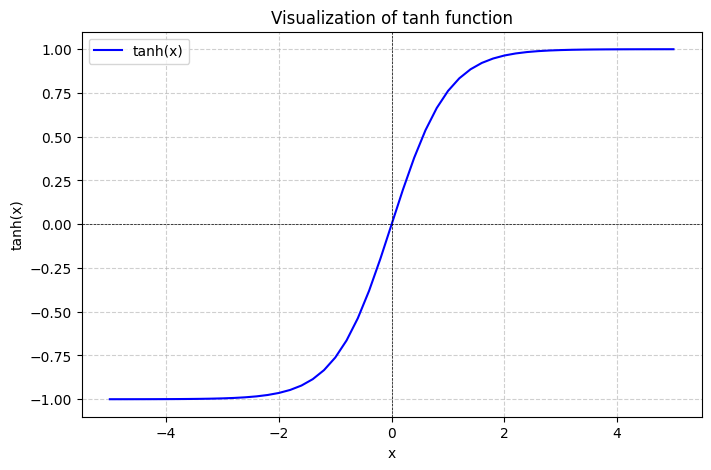

In [11]:
# Define the range and step size
x = np.arange(-5, 5.2, 0.2)
y = np.tanh(x)  # Compute tanh values

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="tanh(x)", color="blue")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.title("Visualization of tanh function")
plt.legend()
plt.show()

# Visualization of the Hyperbolic Tangent (tanh) Function

## Description
This script visualizes the hyperbolic tangent (tanh) function, which is commonly used in neural networks as an activation function. The tanh function maps input values to the range (-1, 1), which helps normalize data and keep it centered around zero. This property makes it particularly useful in deep learning as it can improve convergence during training by mitigating vanishing gradient problems.

## Why it's useful for backpropagation

This maintains relatively large values for inputs around zero. This helps gradients remain significant, unlike the sigmoid function, which can lead to vanishing gradients for large positive or negative inputs. By keeping gradients within a reasonable range, tanh helps facilitate efficient weight updates during backpropagation, making it a preferred choice over sigmoid in many neural network architectures.



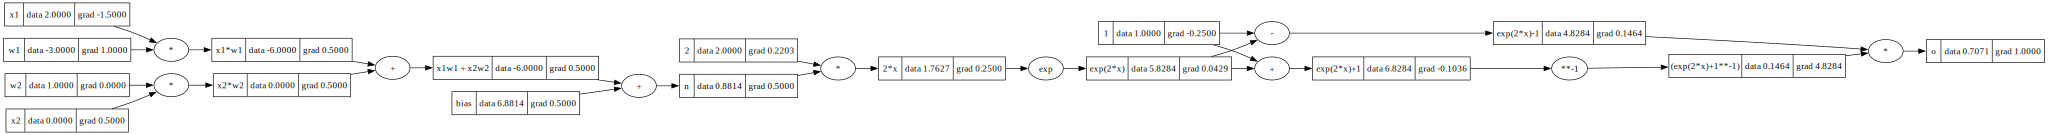

In [12]:
# --- Build the computation graph ---

# Inputs
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")


# Suggested weights and bias to keep the activation in a non-saturated regime
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

b = Value(6.8813735870195432, label="bias")

# Linear operations
x1w1 = x1 * w1
x1w1.label = "x1*w1"
x2w2 = x2 * w2
x2w2.label = "x2*w2" 

branch1 = x1w1 + x2w2
branch1.label = "x1w1 + x2w2"


# Combine branches and add bias
n = branch1 + b
n.label = "n"

# Output after activation
o = n.tanh()
o.label = "o"

# Backpropagate gradients
o.backward()
draw_dot(o)

In [13]:
import torch


# Avoid this: Using torch.Tensor (can be uninitialized)
# x_wrong = torch.Tensor(2.0)  # Potentially bad ❌

# Inputs with double precision
x1 = torch.tensor(
    [2.0], dtype=torch.double, requires_grad=True
)  # x1 with double precision
x2 = torch.tensor(
    [0.0], dtype=torch.double, requires_grad=True
)  # x2 with double precision

# Weights with double precision
w1 = torch.tensor(
    -3.0, dtype=torch.double, requires_grad=True
)  # w1 with double precision
w2 = torch.tensor(
    1.0, dtype=torch.double, requires_grad=True
)  # w2 with double precision

# Bias with double precision
b = torch.tensor(
    6.8813735870195432, dtype=torch.double, requires_grad=True
)  # b with double precision


# Linear combination
n = (x1 * w1) + (x2 * w2) + b

# Activation function (tanh)
o = torch.tanh(n)

# Backpropagate
o.backward()


print("---------------=========Start==========----------------")

# Print values
print("o:", o.data.item())

# Break

print("---------------===================----------------")

# Print gradients
print("Gradient of x1:", x1.grad.item())
print("Gradient of x2:", x2.grad.item())
print("Gradient of w1:", w1.grad.item())
print("Gradient of w2:", w2.grad.item())
print("Gradient of b:", b.grad.item())

print("---------------=========END==========----------------")

---------------=========Start==========----------------
o: 0.7071067811865476
---------------===================----------------
Gradient of x1: -1.4999999999999998
Gradient of x2: 0.49999999999999994
Gradient of w1: 0.9999999999999999
Gradient of w2: 0.0
Gradient of b: 0.49999999999999994
---------------=========END==========----------------


In [36]:
import random

class Neuron:
    def __init__(self, nin):
        # Initialize weights: one weight per input, randomly between -1 and 1.
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        # Initialize bias: a single value, randomly between -1 and 1.
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        # Compute the weighted sum of inputs and bias.
        # zip(self.w, x) pairs each weight with its corresponding input.
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        # Apply the tanh activation function to introduce non-linearity.
        out = act.tanh()
        return out

    def parameters(self):
        # Returns all trainable parameters of the neuron (weights and bias).
        # Returning a list of Value: The list of weights followed by the bias.
        return self.w + [self.b]

# Example usage:
x = [1.0, -1.0]  # Input vector with two elements.
n = Neuron(2)  # Create a neuron that expects 2 inputs.
result = n(x)  # Compute the neuron's output.
print(result)

Value(data=-0.8583729635347114, grad=0.0)


# Implementing a Simple Neuron with Automatic Differentiation

Demonstrated above is how to implement a simple neuron using a custom `Value` class for automatic differentiation. The neuron computes a weighted sum of its inputs, adds a bias, and then applies the hyperbolic tangent (tanh) activation function. This approach provides insight into the forward pass and the gradient propagation mechanism used during backpropagation.

# Feed-Forward Neuron in a Legal Language Model

In our legal language model pretraining framework, each neuron computes its output as follows:

output = tanh(∑(wᵢ * xᵢ) + b)

This equation represents the core operation of a feed-forward neuron:
- **\(wᵢ\):** The weights assigned to each input.
- **\(xᵢ\):** The individual inputs.
- **\(b\):** The bias term.
- **\(sum{ᵢ} wᵢ \, xᵢ\):** The dot product between the weights and the inputs.
- **\(tanh\):** The hyperbolic tangent activation function, which introduces non-linearity and ensures the output is bounded between -1 and 1.

## Application to Legal Language Modeling

For a legal language model, the inputs \(xᵢ\) will be tokenized representations of various legal documents and components, such as:

## 1. **Case Law**

   - **Detailed Judicial Opinions and Rulings:** Decisions from various courts, including the Constitutional Court, Supreme Court of Appeal, High Courts, and specialized tribunals. These documents provide insights into judicial reasoning, precedents, and interpretations of the law.

   - **Examples:**
     - *Axiam Holdings Ltd v Deloitte & Touche* 2006 (1) SA 237 (SCA)
     - *Butters v Mncora* 2012 (4) SA 1 (SCA)
     - *Ganes and Another v Telecom Namibia Ltd* 2004 (3) SA 615 (SCA)

   These cases are pivotal in shaping the legal landscape and are extensively analyzed in legal research and practice.

## 2. **Ratio Decidendi**

   - **Legal Reasoning Behind Decisions:** The principles and legal doctrines established in judicial decisions that serve as precedents for future cases.

   - **Examples:**
     - The principle of *stare decisis*, which mandates that courts follow precedents.
     - The doctrine of *uberrimae fidei* in insurance contracts, emphasizing utmost good faith.

   Understanding these principles is crucial for interpreting and applying the law consistently.

## 3. **Legal Arguments**

   - **Core Points and Counterpoints in Legal Texts:** Arguments presented in legal briefs, scholarly articles, and debates that explore various facets of the law.

   - **Examples:**
     - Discussions on the constitutionality of legislation.
     - Debates on the interpretation of statutory provisions.

   These arguments contribute to the dynamic nature of legal discourse and are vital for comprehensive legal analysis.

## 4. **Statutory References**

   - **Citations from Legal Codes and Regulations:** References to statutes, regulations, and legal codes that govern various aspects of society.

   - **Examples:**
     - *Companies Act 71 of 2008*
     - *Income Tax Act 58 of 1962*
     - *Public Finance Management Act 1 of 1999*

   These statutes provide the legal framework for business operations, taxation, and public finance management in South Africa.

## 5. **Legislation from the Gazettes**

   - **Official Publications of Government Notices:** The Government Gazette publishes new laws, amendments, and official notices.

   - **Examples:**
     - Proclamations by the President.
     - Regulations issued by government departments.

   These documents are authoritative sources for understanding current legal requirements and changes.

## 6. **Academic Textbooks and Scholarly Articles**

   - **In-Depth Analyses and Commentaries:** Publications by legal scholars that provide interpretations, critiques, and discussions on various legal topics.

   - **Examples:**
     - *Contemporary Company Law* by Farouk HI Cassim et al.
     - *South African Mercantile and Company Law* by JTR Gibson

   These resources offer critical insights into the application and evolution of the law.

## 7. **Legal Commentaries and Annotations**

   - **Explanatory Notes on Legislation:** Detailed commentaries that elucidate the meaning and application of statutes.

   - **Examples:**
     - Annotations on the *Companies Act 71 of 2008*.
     - Commentaries on the *Constitution of the Republic of South Africa, 1996*.

   These annotations are invaluable for understanding the practical implications of legal provisions.

## 8. **Legal Dictionaries and Encyclopedias**

   - **Authoritative Definitions and Explanations:** Reference works that define legal terms and concepts.

   - **Examples:**
     - *The South African Law Dictionary* by Juta
     - *The Law of South Africa (LAWSA)*

   These resources are essential for clarifying legal terminology and concepts.

## 9. **International Treaties and Conventions**

   - **Agreements Influencing South African Law:** International agreements that have been incorporated into South African law.

   - **Examples:**
     - The *International Covenant on Civil and Political Rights*
     - The *Convention on the Elimination of All Forms of Racial Discrimination*

   These treaties impact domestic law and are crucial for understanding South Africa's international obligations.

## 10. **Legal Reports and Journals**

   - **Publications Reporting on Legal Developments:** Journals and reports that discuss recent legal cases, trends, and analyses.

   - **Examples:**
     - *South African Law Journal*
     - *De Rebus*

   These publications keep legal professionals informed about current developments in the legal field.

---

By processing these tokenized inputs, the neuron learns to capture the complex relationships and semantic nuances inherent in legal texts. The learned weights \(wᵢ\) and bias \(b\) help transform raw tokenized data into meaningful internal representations.

## Pretraining Benefits

Integrating such neurons into larger architectures (e.g., Transformers) during pretraining offers several advantages:

- **Robust Legal Representations:**  
  The model learns deep, non-linear representations of legal language, which capture both syntax and semantics.
  
- **Enhanced Downstream Performance:**  
  These representations can later be fine-tuned for specific tasks like case summarization, legal document classification, or predictive legal analytics.
  
- **Non-Linear Transformations:**  
  The \(tanh\) activation function helps capture complex, non-linear interactions between legal concepts, which is crucial for modeling the subtleties of legal reasoning.

In summary, the operation

output = tanh(∑(wᵢ * xᵢ) + b)

serves as a fundamental building block in our legal language model. It transforms tokenized legal inputs—such as case law and ratio decidendi—into rich, high-dimensional representations that form the basis for further learning and fine-tuning during pretraining.

This mechanism, embedded within more complex architectures, ultimately contributes to building a model that understands and processes legal language at a sophisticated level.


In [52]:
import time
from itertools import chain
import numpy as np

class Layer:
    def __init__(self, nin, nout):
        # Initialize the layer with `nout` neurons, each expecting `nin` inputs.
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        # Perform a forward pass through all neurons in the layer.
        # `x` is the input vector for the layer.
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]


# def benchmark(layer_class, nin, nout, iterations):
#     layer = layer_class(nin, nout)

#     start_time = time.perf_counter()
#     for _ in range(iterations):
#         _ = layer.parameters()
#     end_time = time.perf_counter()

#     return end_time - start_time


# # Benchmark settings
# nin_values = [10, 100, 1000]
# nout_values = [10, 100, 1000]
# iterations = 100

# # Run benchmarks
# print("Benchmark Results (time in seconds):")
# print(
#     f"{'Input Size':>12} {'Output Size':>12} {'Original':>12}s"
# )
# print("-" * 65)

# for nin in nin_values:
#     for nout in nout_values:
#         time_original = benchmark(Layer, nin, nout, iterations)
#         # time_optimized = benchmark(LayerOptimized, nin, nout, iterations)


#         print(
#             f"{nin:>12} {nout:>12} {time_original:>12.6f}s"
#         )


class MLP:
    """
    A Multi-Layer Perceptron (MLP) class

    The network is composed of multiple layers (instances of the Layer class). Each layer
    processes the input sequentially, with the output of one layer becoming the input to the next.

    Parameters:
    - nin: int
        The number of input features.
    - nouts: list of int
        A list where each element specifies the number of neurons in the corresponding layer.
        For example, nouts=[3, 2] creates an MLP with a first (hidden) layer of 3 neurons
        and an output layer of 2 neurons.

    Design Decisions:
    - Modularity: The MLP is built by composing multiple Layer objects. This promotes code reuse
      and allows each layer to be developed and tested independently.
    - Sequential Forward Pass: The __call__ method loops over all layers, passing the output of
      one layer as the input to the next. This makes the network's operation straightforward.
    """

    def __init__(self, nin, nouts):
        self.layers = []
        # Compute the sizes for all layers by prepending the input dimension.
        # For example, if nin = 2 and nouts = [3, 2], then sizes becomes [2, 3, 2].
        sizes = [nin] + nouts

        # Create each layer by connecting the current size to the next.
        for i in range(len(nouts)):
            # Decision: We create a layer with sizes[i] inputs and sizes[i+1] outputs.
            self.layers.append(Layer(sizes[i], sizes[i + 1]))

    def __call__(self, x):
        # Forward pass through the MLP:
        # Pass the input x through each layer in sequence.
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [53]:
# ---------------------------
# Example usage:

# Define an input vector with three elements.
x = [2.0, 3.0, -1.0]

# Create a Multi-Layer Perceptron with 2 hidden layers of 4 neurons and an output layer of 1 neuron.
n = MLP(3, [4, 4, 1])


n(x)

Value(data=0.5587761367541906, grad=0.0)

In [55]:
n.parameters()

[Value(data=0.9391016221414021, grad=0.0),
 Value(data=0.042080608550465026, grad=0.0),
 Value(data=0.7197437131034614, grad=0.0),
 Value(data=0.01338084746482382, grad=0.0),
 Value(data=0.33833353224764373, grad=0.0),
 Value(data=-0.24762641458290924, grad=0.0),
 Value(data=0.8142779702121496, grad=0.0),
 Value(data=-0.9956860733777007, grad=0.0),
 Value(data=-0.21151485163318196, grad=0.0),
 Value(data=0.04143413086672454, grad=0.0),
 Value(data=0.2353341661296131, grad=0.0),
 Value(data=-0.3123339681918791, grad=0.0),
 Value(data=0.8425887901250564, grad=0.0),
 Value(data=0.7731917094262732, grad=0.0),
 Value(data=0.4974974264883565, grad=0.0),
 Value(data=0.6423979465321212, grad=0.0),
 Value(data=0.6584030445372966, grad=0.0),
 Value(data=-0.2665825192311597, grad=0.0),
 Value(data=-0.85160106905802, grad=0.0),
 Value(data=0.3370232720121049, grad=0.0),
 Value(data=0.7066471473652602, grad=0.0),
 Value(data=-0.010068746012568797, grad=0.0),
 Value(data=-0.6347069923158759, grad=0.

In [57]:
print(f"This neural network has {len(n.parameters())} parameters.")

This neural network has 41 parameters.


In [58]:
# Pre-training data: a list of input examples.
# Each inner list represents a single training example with three features.
pre_training_data = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

# TARGET: The desired outputs for each training example.
TARGET = [1.0, -1.0, -1.0, 1.0]  # Ground truth values for each corresponding input.


# Compute predictions for each training example.
# Here, 'n' is a multi-layer perceptron that takes an input vector and returns a prediction.
TARGET_PREDICTIONS = [n(data) for data in pre_training_data]
# Display the predictions (for debugging or evaluation purposes).
print("Predictions:", TARGET_PREDICTIONS)

Predictions: [Value(data=0.5587761367541906, grad=0.0), Value(data=0.6018947523834258, grad=0.0), Value(data=0.598141289147079, grad=0.0), Value(data=0.5289168034482602, grad=0.0)]


In [59]:
# Calculate the Mean Squared Error (MSE) loss.
# For each pair of (target, prediction), we compute the squared difference.
# Then, we sum all the squared differences. (Typically, MSE would also include dividing by the number of examples,
# but here we're simply summing the squared errors, which is often sufficient for minimization purposes.)
loss = sum(
    [(prediction - truth) ** 2 for truth, prediction in zip(TARGET, TARGET_PREDICTIONS)]
)
# Display the computed loss.
print("Loss:", loss)

# Explanation:
# The goal during training is to minimize this loss. When the model's predictions exactly match the targets,
# each (prediction - truth)**2 will be zero, and hence the overall loss will be zero.

Loss: Value(data=5.5367202533612065, grad=0.0)


In [60]:
loss.backward()

In [61]:
n.layers[0].neurons[0].w[0].grad

-0.04355000737698636

## What Happened

### 1. Model Predictions

- **Output Format:**  
  The model produced a list of `Value` objects as predictions. Each `Value` object contains:
  - `data`: The numerical output of the model for a given input.
  - `grad`: The gradient placeholder, which is initially set to `0.0`.

- **Example Predictions:**  
  ```python
  [Value(data=0.5587761367541906, grad=0.0),
    Value(data=0.6018947523834258, grad=0.0),
    Value(data=0.598141289147079, grad=0.0),
    Value(data=0.5289168034482602, grad=0.0)]
   ```

These values represent the network's computed output for each input sample before any gradient computations are performed.

### 2. Computed Loss

- **Loss Calculation:**
The loss is computed to measure the discrepancy between the predictions and the target values using a loss function (such as Mean Squared Error).

- **Loss Representation:**
  The loss is also a Value object:
  ```python
  Value(data=5.5367202533612065, grad=0.0)
  ```
  - `data`: Indicates the magnitude of the error (here, approximately 5.54).
  - `grad`: Initially 0.0 until backpropagation is performed.

### 3. Backpropagation
 - **Initiating Backward Pass:**
  The call to `loss.backward()` triggers the backpropagation process. This involves:
  - Traversing the computational graph in reverse.
  - Calculating the gradient of the loss with respect to each parameter using the chain rule.
  - Updating each Value object's grad field with the computed gradients.

### 4. Inspecting a Specific Gradient

  - After running `loss.backward()`, inspecting a specific parameter's gradient:

      `n.layers[0].neurons[0].w[0].grad`

      `Output: -0.04355000737698636`
  - This value represents how sensitive the loss is to changes in the first weight of the first neuron in the first layer.
  - A non-zero gradient indicates that adjusting this weight will affect the loss, guiding the optimization process.

 ### Determining the Direction for the Weight Update

The gradient for the weight `n.layers[0].neurons[0].w[0]` is positive:

In gradient descent, the weight update rule is:

$$
w_{\text{new}} = w_{\text{old}} - \eta \cdot \text{grad}
$$

Where:

η is the learning rate; grad is the gradient of the loss with respect to the weight.


Since the gradient is positive, subtracting a positive value will decrease the weight.

Therefore, to minimize the loss, the weight should be decreased.

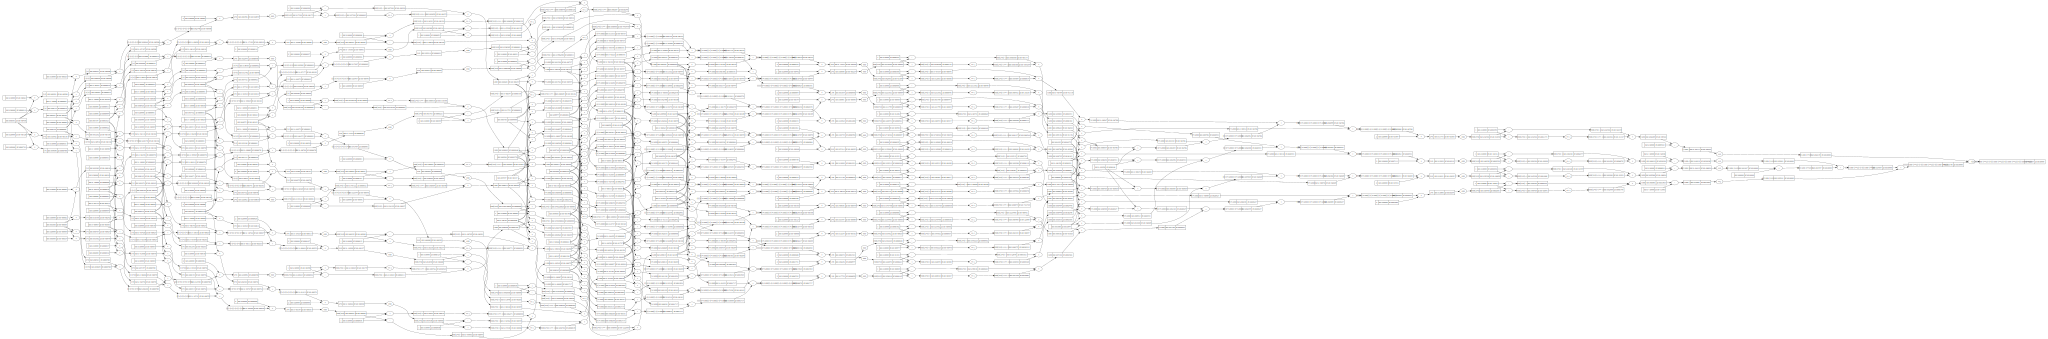

In [62]:
draw_dot(loss)

In [66]:
gradient_in_respect_to_loss = n.layers[0].neurons[0].w[0].grad
weight = n.layers[0].neurons[0].w[0].data
print(f"Parameter gradient: {gradient_in_respect_to_loss} | Parameter weight: {weight}")

Parameter gradient: -0.04355000737698636 | Parameter weight: 0.9391016221414021


In [69]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [76]:
gradient_of_loss_with_respect_to_weight = n.layers[0].neurons[0].w[0].grad
weight = n.layers[0].neurons[0].w[0].data
print(
    f"Loss gradient in respect to this specific parameter: {gradient_of_loss_with_respect_to_weight} | Parameter weight: {weight}"
)

Loss gradient in respect to this specific parameter: -0.04355000737698636 | Parameter weight: 0.9404081223627118


In [74]:
TARGET_PREDICTIONS = [n(data) for data in pre_training_data]
loss = sum(
    [(prediction - truth) ** 2 for truth, prediction in zip(TARGET, TARGET_PREDICTIONS)]
)
# Display the computed loss.
print("Loss:", loss)

Loss: Value(data=4.58223769009373, grad=0.0)


Since this parameter has a negative gradient, decreasing it would decrease the loss.

In [87]:
loss.backward()
n.layers[0].neurons[0].w[0].grad

3.5999051111579807

In [88]:
for p in n.parameters():
    p.data += -0.01 * p.grad

gradient_in_respect_to_loss = n.layers[0].neurons[0].w[0].grad
weight = n.layers[0].neurons[0].w[0].data
print(f"Parameter gradient: {gradient_in_respect_to_loss} | Parameter weight: {weight}")

TARGET_PREDICTIONS = [n(data) for data in pre_training_data]
loss = sum(
    [(prediction - truth) ** 2 for truth, prediction in zip(TARGET, TARGET_PREDICTIONS)]
)
# Display the computed loss.
print("Loss:", loss)

Parameter gradient: 3.5999051111579807 | Parameter weight: 0.8691288080657937
Loss: Value(data=0.9567263629251836, grad=0.0)
